# CMPT 732 - Fall 2021
# OpenCV introduction

__content creator:__ Aryan Mikaeili

#Introduction

OpenCV is a library that makes computer vision tasks fast and efficient. It contains many functions of computer vision like edge detection, filtering, key-point matching, and etc, as well as tools to create and edit images. Python and C++ both have OpenCV APIs.

#Installing and importing

To install the library on your localhost you can use __pip__. In order to do that, just type __pip install opencv-python__ in your terminal. In Colab OpenCV has already been installed so there is no need to do any extra things.

In [1]:
#importing OpenCV
import cv2

For this notebook we will also need Numpy and Matplotlib. On your local computer you can simply install them using pip.

In [2]:
#importing numpy and matplotlib

import numpy as np
import matplotlib.pyplot as plt


#please ignore this line 
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")

#Practice 1

1. using __cv2.imread()__ read one of the images.
2. make sure the image is loaded properly by using __is None__
3. print the image type, the image shape, and a 3 $\times$ 3 window of it.
4. now using plt.imshow() show the image.

In [3]:
#read the image

image = ...

#check if the image is loaded properly

if ...:
  print('image not loaded properly')
else:
  print('image loaded properly')

#print image type, shape, and a 3*3 window of the image

print('type:', ...)
print('shape:', ...)
print('3*3 window:', ...)

#show the image
...



image not loaded properly
type: Ellipsis
shape: Ellipsis
3*3 window: Ellipsis


Ellipsis

image loaded properly
type: uint8
shape: (512, 512, 3)
3*3 window: [[[125 137 226]
  [125 137 226]
  [133 137 223]]

 [[125 137 226]
  [125 137 226]
  [133 137 223]]

 [[125 137 226]
  [125 137 226]
  [133 137 223]]]


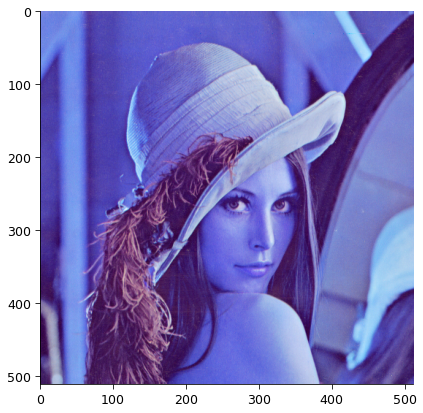

In [4]:
#@title Solution

#read the image

image = cv2.imread('images/Lenna.png')

#check if the image is loaded properly

if image is None:
  print('image not loaded properly')
else:
  print('image loaded properly')

#print image type, shape, and a 3*3 window of the image
print('type:', image.dtype)
# 512 * 512 * 3, each pixel contains three values, RGB
print('shape:', image.shape)
print('3*3 window:', image[:3, :3, :])

#show the image
plt.imshow(image)
plt.show()



What happened is that because OpenCV reads images in BGR format, the color channels are reversed. This can be fixed by using the following piece of code

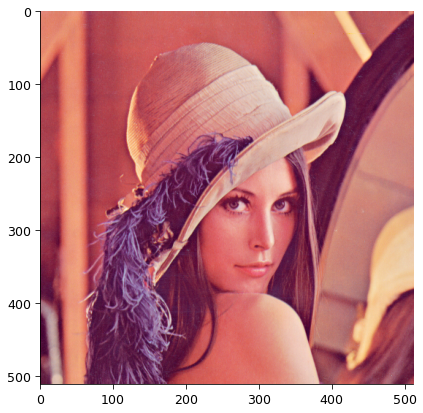

In [5]:
#converting BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.show()


#Basic Operations on images

#Practice 2

1. create a 100 $\times$ 100 black images. note that as we saw OpenCV uses numpy arrays to represent images.

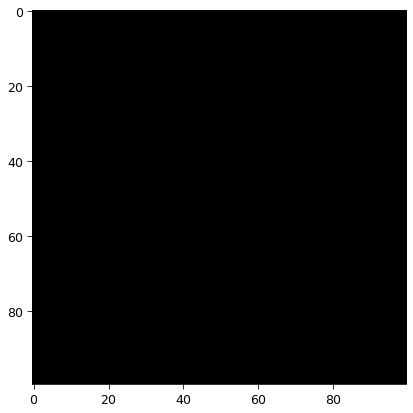

In [6]:
# rgb
image = np.zeros((100, 100, 3))

plt.imshow(image)
plt.show()

[[0. 0. 0.]
 [0. 0. 0.]]


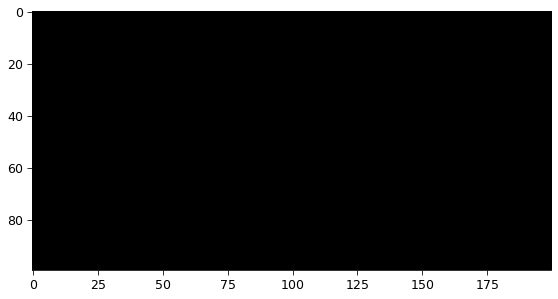

In [7]:
#@title Solution
# reverse order, x axis is height, y axis is width
image = np.zeros((100, 200))
test = np.zeros((2,3))
print(test)
# cmap='gray', gray scale, 0 is black, 256 is white
plt.imshow(image, cmap='gray')
plt.show()

2. You can draw a line in an image using OpenCV with cv2.line(image, start point, end point, color, thickness). draw a line on one of the diagonals of the black image.

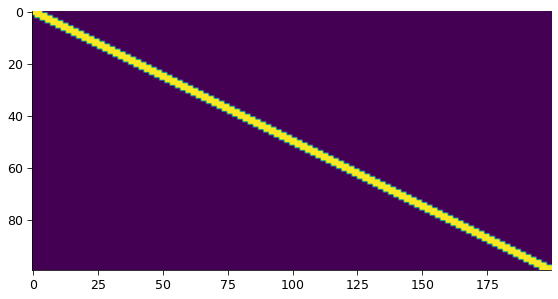

In [8]:
#rgb
# first two is the size, third is the color
# reverse the order, because x is height, y is width
image = cv2.line(image, (0, 0), (image.shape[1], image.shape[0]), [200, 0, 0], 2)

plt.imshow(image)
plt.show()

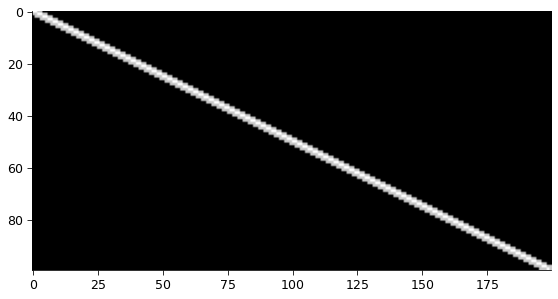

In [9]:
#@title Solution

image = cv2.line(image, (0, 0), (image.shape[1], image.shape[0]), 255, thickness=1)

plt.imshow(image, cmap='gray')
plt.show()


3. You can also draw shapes on an image. for example draw a rectangle and a circle using cv2.rectangle(image, top left, bottom right, color, thickness), cv2.circle(image, center, radius, color, thickness).

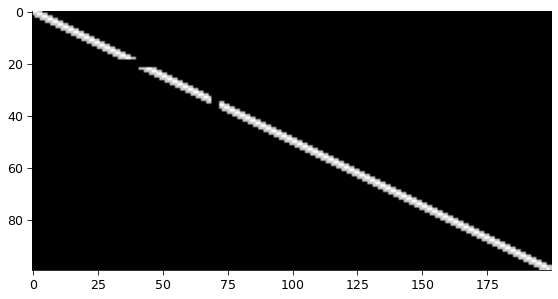

In [10]:
#draw a rectangle rgb

image = cv2.rectangle(image, (20, 20), (70, 80), (0, 200, 0), 2)
plt.imshow(image, cmap='gray')
plt.show()

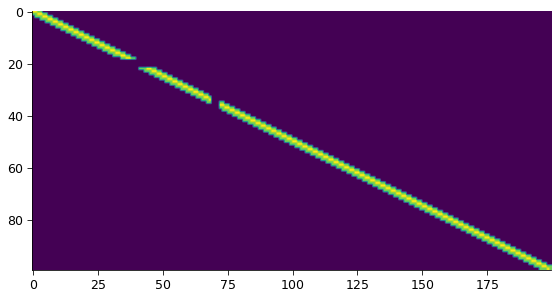

In [11]:
#add a circle, rgb
image = cv2.circle(image, (30, 30), 10, (0,0,150), 3)
plt.imshow(image)
plt.show()

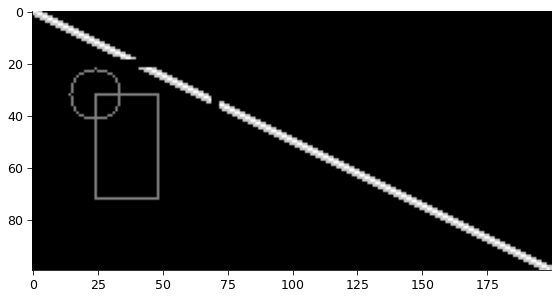

In [12]:
#@title Solution

#draw a rectangle

image = cv2.rectangle(image, (24, 32), (48, 72), color=128, thickness=1)
plt.imshow(image, cmap='gray')

#add a circle
image = cv2.circle(image, (24, 32), 10, color=128, thickness=1)
plt.imshow(image, cmap='gray')
plt.show()

There are also other possibilities like adding other shapes, adding text, and etc.

#Modyfing pixels

Because in OpenCV images are just numpy arrays, they can be easily modified.

#Practice 3

1. Load messi.jpg 
2. change a 5 $\times$ 5 window to green
3. copy a 50 $\times$ 50 window to another part of the image.

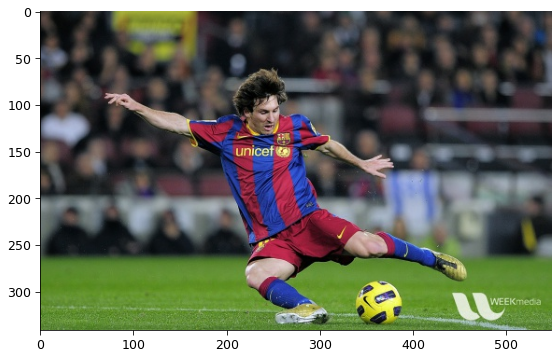

In [13]:
#load the image

image = cv2.imread('images/messi.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

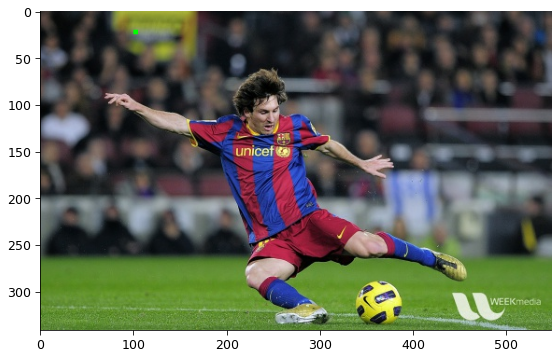

In [14]:
#change a 5*5 window to green
image.shape
image[20:25, 100:105] = [0, 255, 0]
plt.imshow(image)
plt.show()


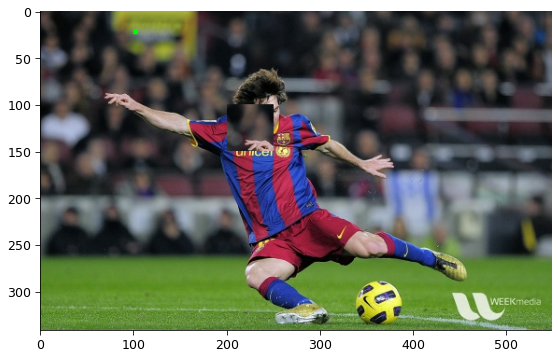

In [15]:
#copy a 50*50 window
image[100:150, 200:250] = image[50:100, 50:100]
plt.imshow(image)

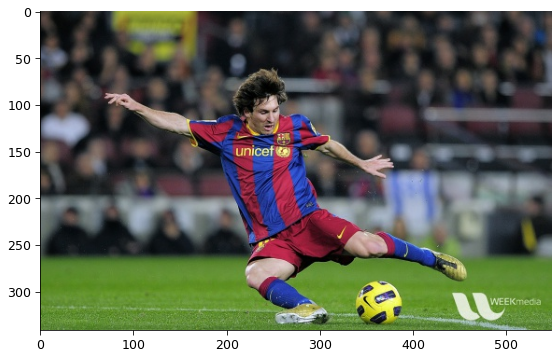

In [16]:
#@title Solution
#loading the image

image = cv2.imread('images/messi.jpg')

#convert to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.show()

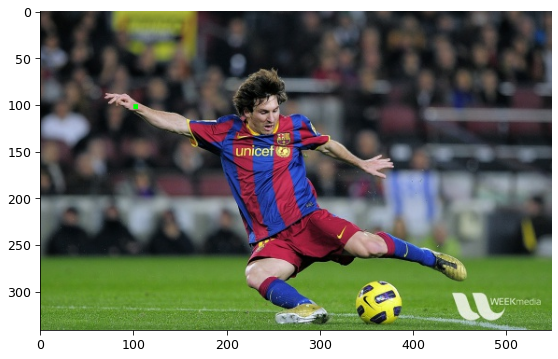

In [17]:
#@title Solution
#change a 5*5 window to green

image[100:105, 100:105] = [0, 255, 0]

plt.imshow(image)
plt.show()

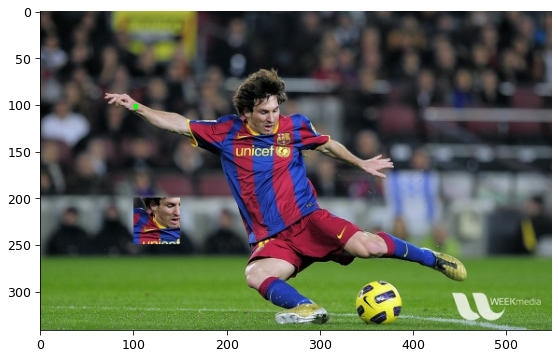

In [18]:
#@title Solution
#copy a 50*50 window

image[200:250, 100:150] = image[100:150, 200:250]

plt.imshow(image)
plt.show()

#Practice4: Sobel edge detector

As mentioned at the beginning, One of the things that we can do with OpenCV is edge detection. Sobel edge detector is one of the most prominent methods of edge detection. the Sobel function in OpenCV is as follows: __cv2.Sobel(image, type of output, order of the derivative x, order of the derivative y, kernel size = 3, scale = 1.0)__
kernel is odd number

1. load wheel.png as a grayscale image.
2. find the edges in x and y directions
3. find the magnitude of edges in each pixel
4. show the edges



In [19]:
#load image as grayscale

image = cv2.imread('images/wheel.png', cv2.IMREAD_GRAYSCALE)

#compute sobel filters in x and y directions
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1)

#compute the intensity of edges for each pixel
edges = np.sqrt(sobel_x**2 + sobel_y**2)



In [20]:
#@title Solution
image = cv2.imread('images/wheel.png', cv2.IMREAD_GRAYSCALE)

sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1)

edges = np.sqrt(sobel_x ** 2 + sobel_y ** 2)


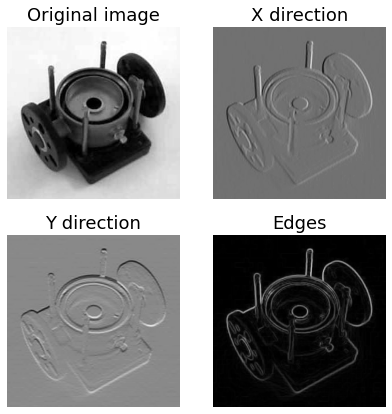

In [21]:
#@title check your answer by running this cell
# edges of x is vertical, y is horizontal
fig, axes = plt.subplots(2, 2, figsize = (6, 6))

axes[0, 0].imshow(image, cmap = 'gray')
axes[0, 0].set_title('Original image')
axes[0, 0].axis('off')

axes[0, 1].imshow(sobel_x, cmap = 'gray')
axes[0, 1].set_title('X direction')
axes[0, 1].axis('off')

axes[1, 0].imshow(sobel_y, cmap = 'gray')
axes[1, 0].set_title('Y direction')
axes[1, 0].axis('off')


axes[1, 1].imshow(edges, cmap = 'gray')
axes[1, 1].set_title('Edges')
axes[1, 1].axis('off')
plt.show()



#Practice5: Removing noise

One of the tasks that can be done with OpenCV is noise removal. 
One of the most common noises in images is the salt and pepper noises. Run the cell below to see an image with this kind of noise.

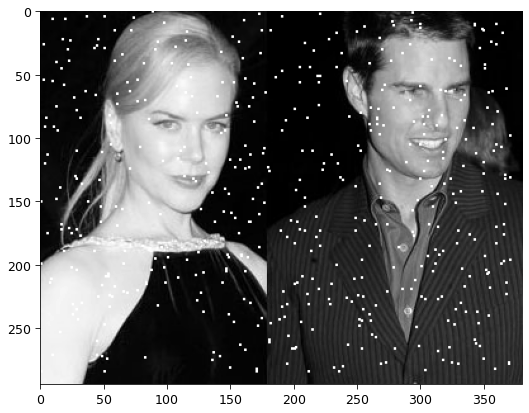

In [22]:
#@title Run this cell to generate noisy image

image = cv2.imread('images/kidman-cruise.jpg', cv2.IMREAD_GRAYSCALE)

noise_loc_x = np.random.randint(0, image.shape[0] - 10, 500)
noise_loc_y = np.random.randint(0, image.shape[1] - 10, 500)

noise_loc = np.concatenate([noise_loc_x, noise_loc_y])

for i in range(500):
  image[noise_loc_x[i]: noise_loc_x[i] + 2, noise_loc_y[i]:noise_loc_y[i] + 2] = 255


plt.imshow(image, cmap='gray')
plt.show()

One way to remove this kind of noise is by **median filtering**. median filtering means that we take windows of a certain size and slide it on the image. In each window we take the median of the pixel values and put it in the pixel at the center of the window. Search how you can do median filtering in openCV an denoise the image. See what happens when you change window size.

In [23]:
#denoise image
denoised_image = cv2.medianBlur(image, 5)

In [24]:
#@title Solution 
# medianBlur(image, kernel size)
# kernel size is window size, the square you choice, 5*5 window for image
denoised_image = cv2.medianBlur(image, 5)



In [25]:
# center pixel is median of all 3*3 pixels
denoised_image = cv2.medianBlur(image, 3)

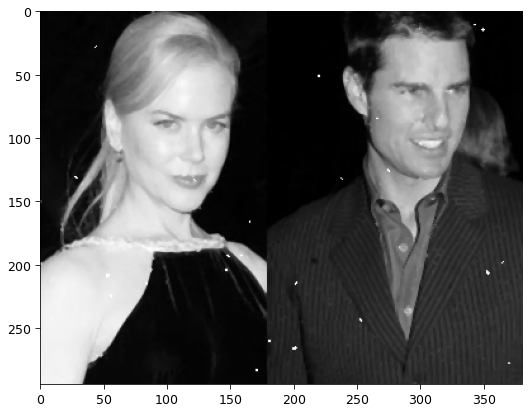

In [26]:
#@title Run this cell to check your solution
plt.imshow(denoised_image, cmap='gray')
plt.show()